# CIA2 - Handling Non-Normal and Weakly Correlated Regression Data

**Name**:Thamizhanbu E  
**Regno**:23122042  
**Class**:MScDSA  
**Date**:17/5/24  

### Importing Dataset

In [414]:
import pandas as pd

# Import the data from a CSV file
data = pd.read_csv('cancer_reg.csv')
print("Row:",data.shape[0],"\nColumn:",data.shape[1])

Row: 3047 
Column: 33


### Data Head

In [415]:
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


### Dataset Statistics

In [416]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### Handling Null Values

In [417]:
data.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [418]:
data = data.dropna(axis=1)

### Handling Textual Data

In [419]:
data = data.drop(['binnedinc','geography'],axis=1)

In [420]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

### Model Creation

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

features = ['avganncount', 'avgdeathsperyear', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["target_deathrate"], test_size=0.2, random_state=42)

# Create the multilinear model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Means Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 420.0353466152795
Means Absolute Error: 15.222529278912484
Mean Absolute Percentage Error: 0.08819759990417804
R-squared: 0.4866632798212065


From the model adequecy measures, we can see that the error effect is more and R2 score is 48%.  
This reflects that the model does not have a good fit to produce high accuracy.

### Correlation with Target Column

In [411]:
data.corr()["target_deathrate"].sort_values(ascending=False)

target_deathrate          1.000000
incidencerate             0.449432
pctpubliccoveragealone    0.449358
povertypercent            0.429389
pcths25_over              0.404589
pctpubliccoverage         0.404572
pctunemployed16_over      0.378412
pcths18_24                0.261976
pctblack                  0.257024
pctnohs18_24              0.088463
medianagefemale           0.012048
medianage                 0.004375
medianagemale            -0.021929
studypercap              -0.022285
birthrate                -0.087407
avgdeathsperyear         -0.090715
popest2015               -0.120073
avganncount              -0.143532
pctwhite                 -0.177400
pctasian                 -0.186331
pctotherrace             -0.189894
percentmarried           -0.266820
pctempprivcoverage       -0.267399
pctbachdeg18_24          -0.287817
pctmarriedhouseholds     -0.293325
pctprivatecoverage       -0.386066
medincome                -0.428615
pctbachdeg25_over        -0.485477
Name: target_deathra

None of the Regressor is having a strong correlation with the dependent column.

### Checking Multicollinearity

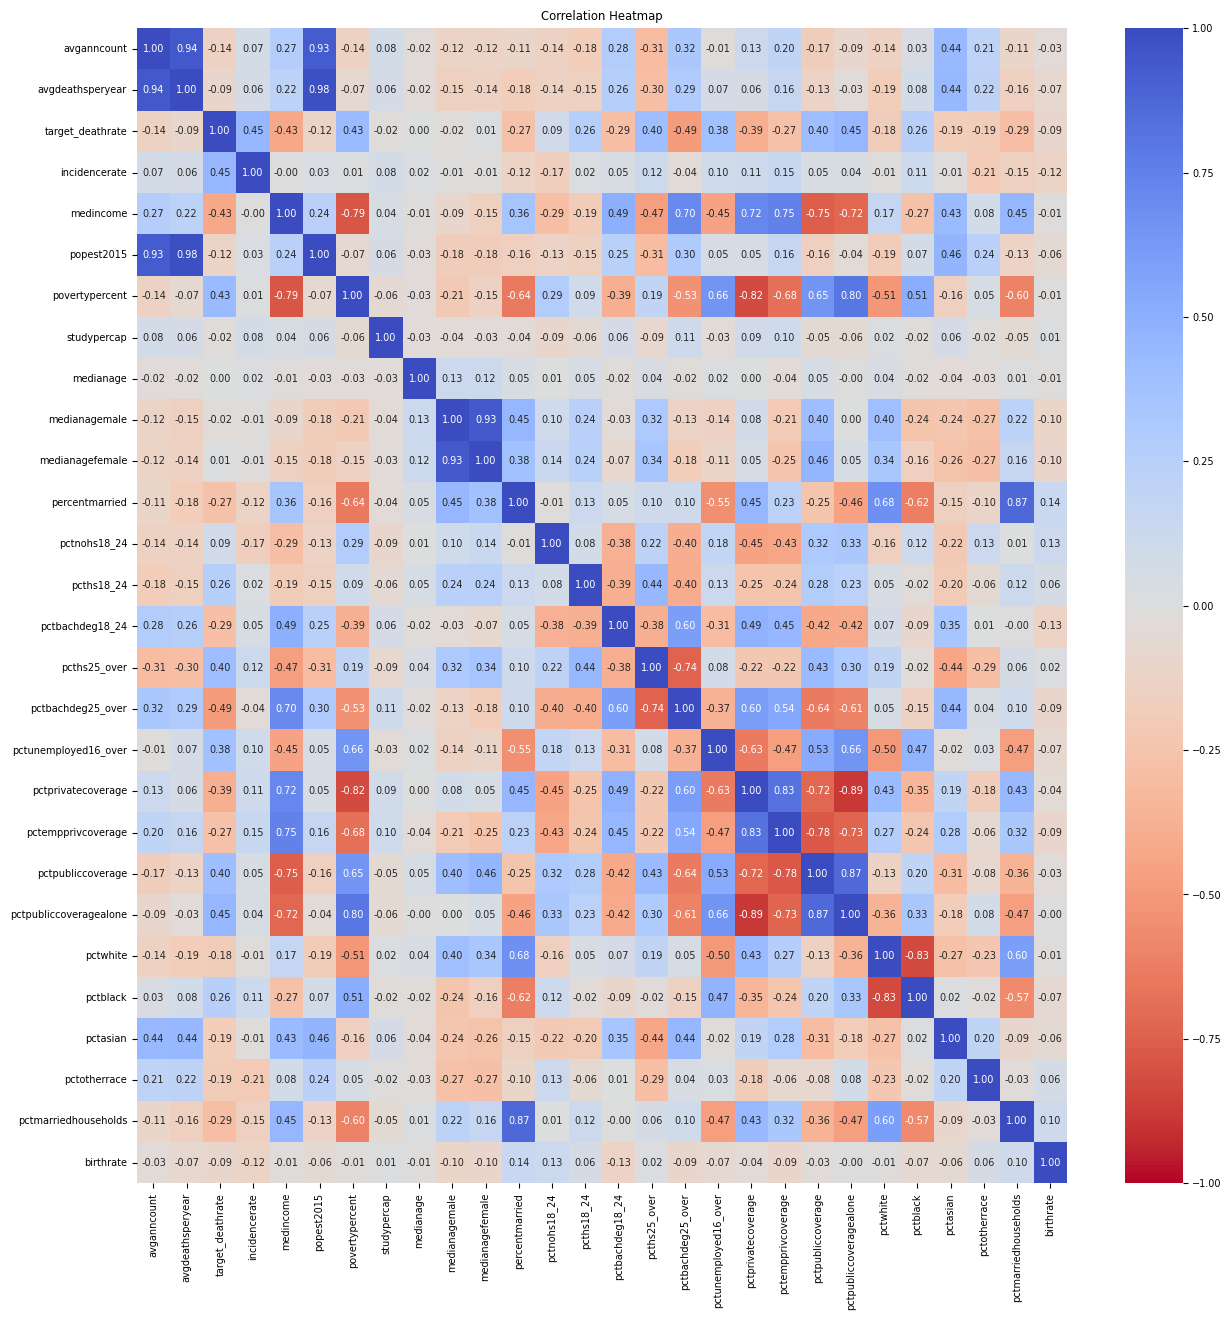

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
correlation_matrix.to_excel("Correlation.xlsx")

plt.figure(figsize=(15, 15))

plt.rcParams.update({'font.size': 7})

sns.heatmap(correlation_matrix, cmap="coolwarm_r", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
drop_multi = ["avgdeathsperyear","povertypercent","pctbachdeg25_over","pctempprivcoverage","pctpubliccoverage",
              "pctpubliccoveragealone","pctprivatecoverage","popest2015","medianagefemale","pctwhite","pctblack"
              ,"pctmarriedhouseholds"]
data = data.drop(drop_multi,axis=1)

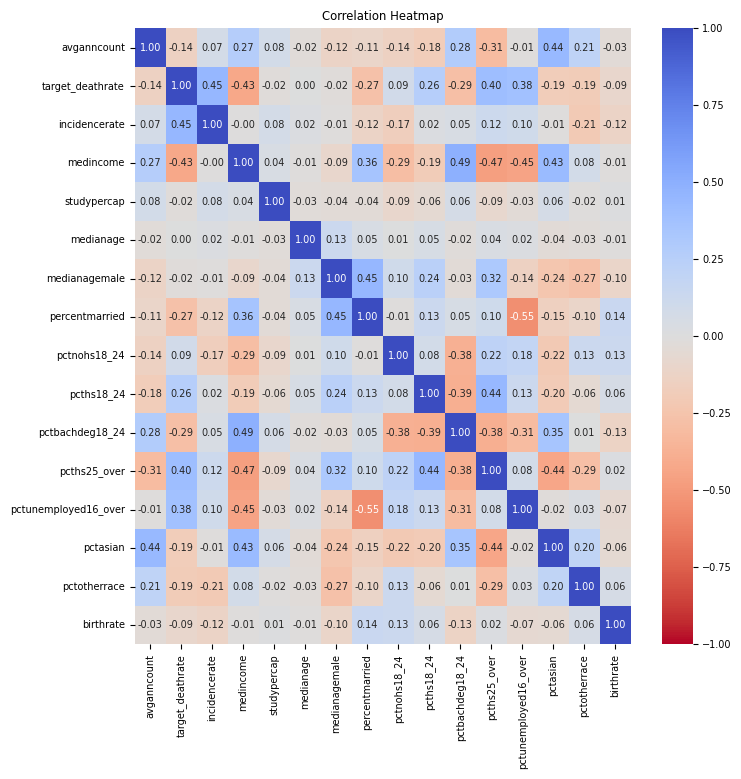

In [12]:
correlation_matrix = data.corr()
correlation_matrix.to_excel("Correlation1.xlsx")

plt.figure(figsize=(8, 8))

plt.rcParams.update({'font.size': 7})

sns.heatmap(correlation_matrix, cmap="coolwarm_r", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Thus, Multicollinear Columns are removed.

### Model Creation

In [374]:

features = ['avganncount', 'incidencerate', 'medincome',
       'studypercap', 'medianage', 'medianagemale', 'percentmarried',
       'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctunemployed16_over', 'pctasian', 'pctotherrace', 'birthrate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["target_deathrate"], test_size=0.2, random_state=42)

# Create the multilinear model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Means Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 426.6068887130177
Means Absolute Error: 15.496280501679006
Mean Absolute Percentage Error: 0.08920620145283684
R-squared: 0.47863201794252563


## Checking Linearity

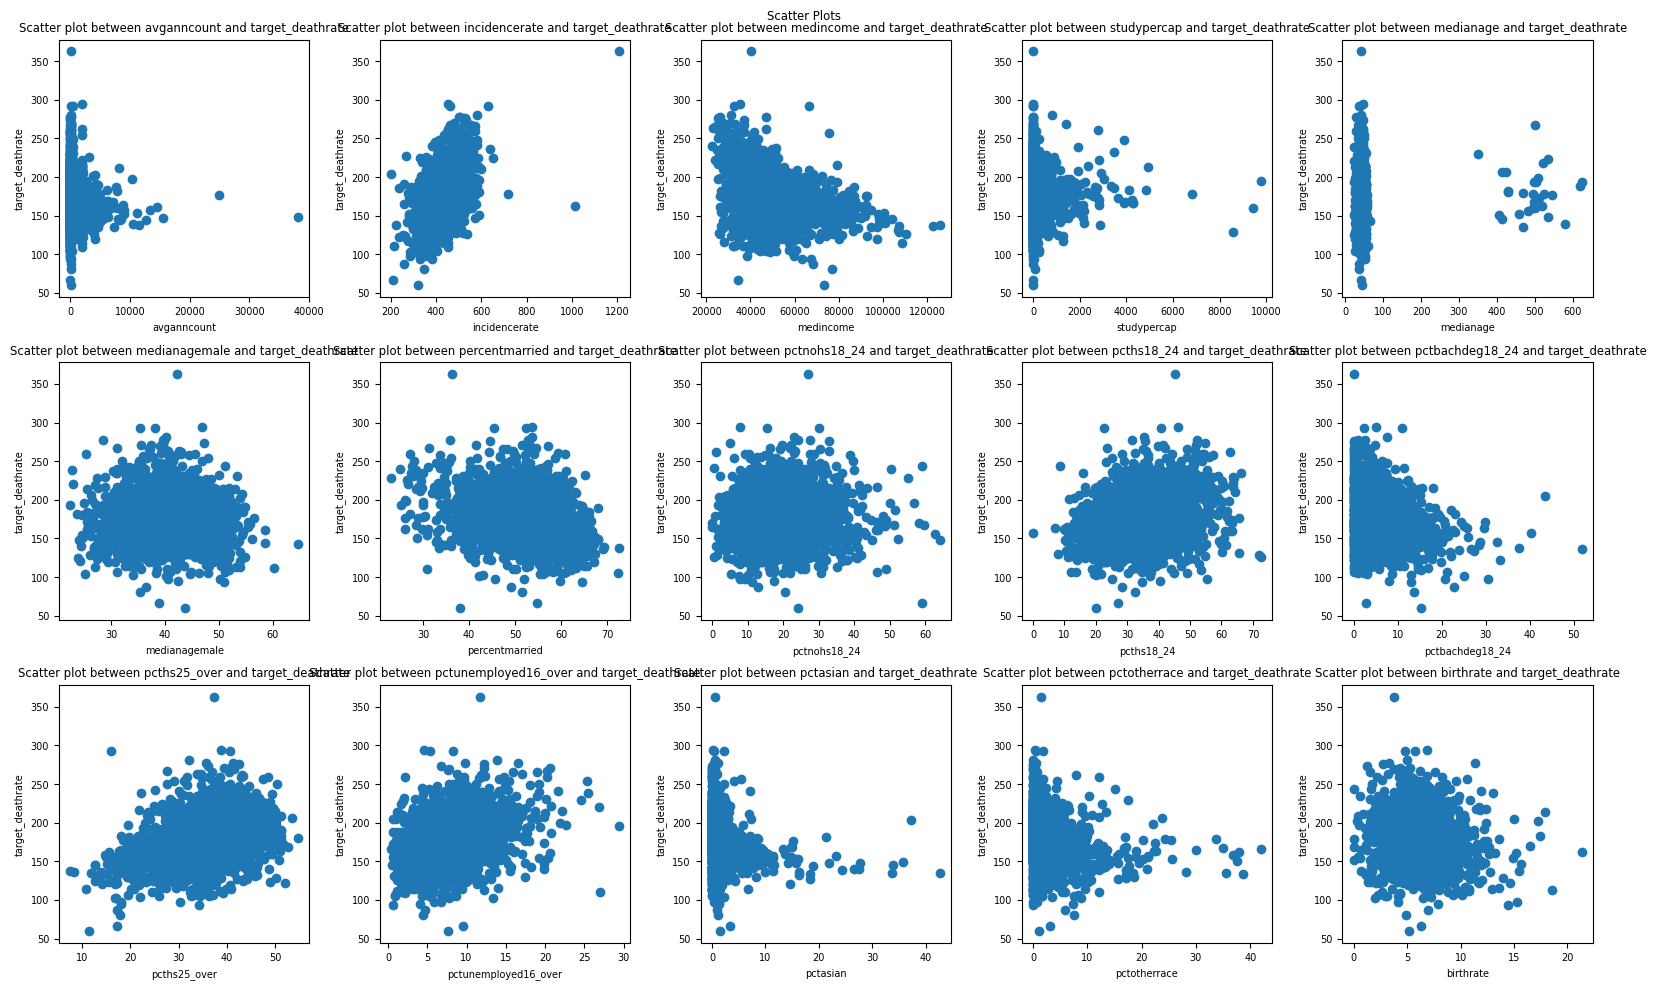

In [14]:
target = "target_deathrate"

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 10))
fig.suptitle('Scatter Plots')

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(features):
        ax.scatter(data[features[i]], data[target])
        ax.set_title(f'Scatter plot between {features[i]} and {target}')
        ax.set_xlabel(features[i])
        ax.set_ylabel(target)
    else:
        ax.axis('off')  

plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()



Only 'incidencerate' is having a visible linear correlation with target column.

## Checking Autocorrelation

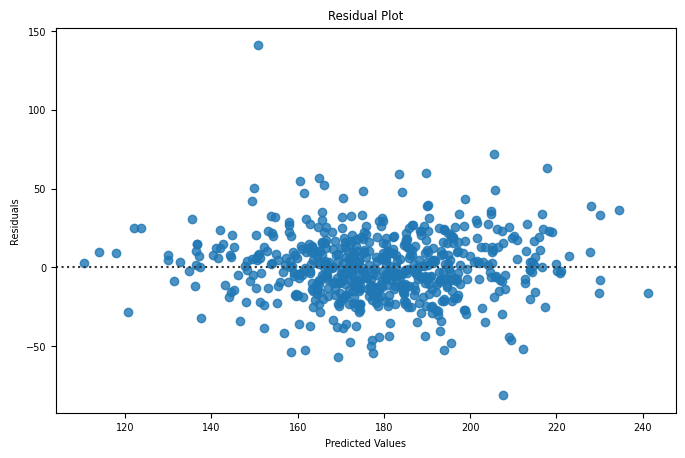

In [15]:
# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=(y_test-y_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


No pattern is visible in the residual scatter plot. This denotes the absence of autocorrelation.

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [17]:
from statsmodels.regression.linear_model import OLS
# Durbin-Watson test
durbin_watson = sm.stats.stattools.durbin_watson((y_test-y_pred))
print('Durbin-Watson statistic:', durbin_watson)


Durbin-Watson statistic: 2.0411778001635077


Since, the Durbin-Watson statistics value is between 1.5 and 2.5, null hypothesis is accepted i.e. Absence of Autocorrelation is true.

## Checking Homoscedasticity

In [18]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
X = data[features] # Independent variables
y = data[target]
# Add a constant term to the independent variables
X = sm.add_constant(X)
# Fit the multiple regression model
model = sm.OLS(y, X).fit()
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 79.82598475736236, 'LM-Test p-value': 7.515481481176271e-11, 'F-Statistic': 5.436206494948465, 'F-Test p-value': 5.3392220054175876e-11}


The P vlaue of the BP Test is less than 0.05 and so we reject the null hypothesis i.e. Presence of Homoscedasticity is false.  
This shows that the error is hetroscedastic.

## Checking Normality

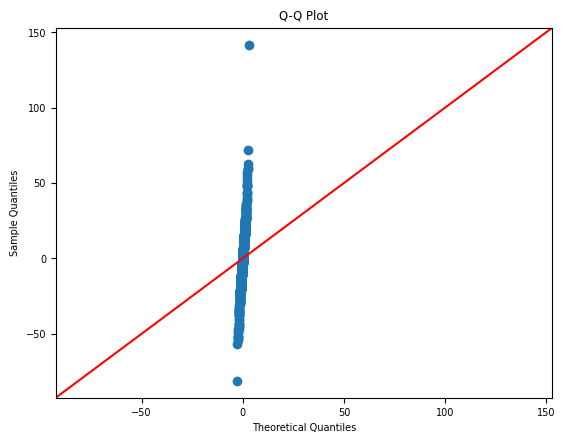

In [19]:
 #Q-Q plot
sm.qqplot((y_test-y_pred), line='45')
plt.title('Q-Q Plot')
plt.show()

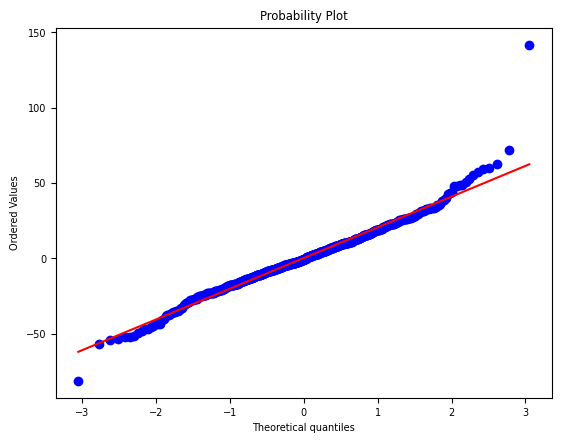

In [20]:
# Create a PP plot
stats.probplot((y_test-y_pred), dist="norm", plot=plt)
plt.title('Probability Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [21]:
# Shapiro-Wilk test
shapiro_test = stats.shapiro((y_test-y_pred))
print(f'Shapiro-Wilk test: {shapiro_test}')

Shapiro-Wilk test: ShapiroResult(statistic=0.9690648913383484, pvalue=4.791881891286209e-10)


The Shapiro Test is getting rejected since the p-value is less than 0.05.  
The distribution of points are also not over the line.  
These denotes that error is not normally distrubuted.

### Checking Multicollinearity

In [22]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["regressor"] = data[features].columns
vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(data[features].shape[1])]
print(vif_data)

               regressor         VIF
0            avganncount    1.578435
1          incidencerate   58.950460
2              medincome   36.112859
3            studypercap    1.112690
4              medianage    2.039020
5          medianagemale   88.898480
6         percentmarried  116.508194
7           pctnohs18_24    7.877994
8             pcths18_24   23.207833
9        pctbachdeg18_24    4.941228
10          pcths25_over   45.754419
11  pctunemployed16_over    8.709921
12              pctasian    1.986307
13          pctotherrace    1.564826
14             birthrate    9.586127


The VIF Score shows that theere is multicollinearity among the regressor columns.

## Inference
- The data considered only has weakly correlating regressors with respect to the target column.
- Additionally, multi linear model's assumptions like, normality, homoscedasticity are violated.
- These factors affect the linear model's performance that are built using this data.

#### Model Functions

In [451]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA,PLSCanonical
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

def model_eval(X_train,y_train,X_test,y_test):
    # Create the multilinear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using evaluation metrics
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Means Absolute Error:",mean_absolute_error(y_test, y_pred))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    return y_pred

def modelVisualization(X_train,y_train,y_pred):
    # Plotting the actual data points
    plt.scatter(X_train, y_train, color='blue', label='Actual')

    # Plotting the predicted regression line
    plt.plot(X_train, y_pred, color='red', label='Predicted')

    # Adding labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')

    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

In [452]:
data_original = pd.read_csv('cancer_reg.csv')
data_original = data_original.dropna(axis=1)
data_original = data_original.drop(['binnedinc','geography'],axis=1)
features = ['avganncount', 'avgdeathsperyear', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate']
target = "target_deathrate"


## Handling Weak Correlating and Non-Normal Data

- Since the normality assumption has failed, we will need to transform the data to achieve normality.  
- One method that can be used is the 'Yeo-Johnson' transformation. This transformation is suitable for both positive and negative data values and can handle zero and negative values.   
- By applying the 'Yeo-Johnson' transformation, we aim to achieve a more normal distribution of the data.

### Yeo-Johnson Transformation

In [454]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_pt = pd.DataFrame(pt.fit_transform(data_original[features]),columns=features)
X_train, X_test, y_train, y_test = train_test_split(data_pt, data_original[target], test_size=0.2, random_state=42)
y_pred = model_eval(X_train,y_train,X_test,y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Shapiro-Wilk test
shapiro_test = stats.shapiro((y_test-y_pred))
print(f'\nShapiro-Wilk test: {shapiro_test}')



Mean Squared Error: 198.32245354990533
Means Absolute Error: 10.382161822522805
Mean Absolute Percentage Error: 0.059942957452671
R-squared: 0.7576246888184716

Shapiro-Wilk test: ShapiroResult(statistic=0.959873378276825, pvalue=7.541720720150025e-12)


## Inference
- Here, shapiro test for normality got rejected which denotes that the data still significantly deviate from normality.
- Even though normality is not fully achieved, the performance of the model has increased.
- When used the original features, R2 score was 48.6% and after 'Yeo-Johnson' trnaformation, the R2 Score increased to 75.7% which a significantly high improvement.

## Data Distribution after Transformation

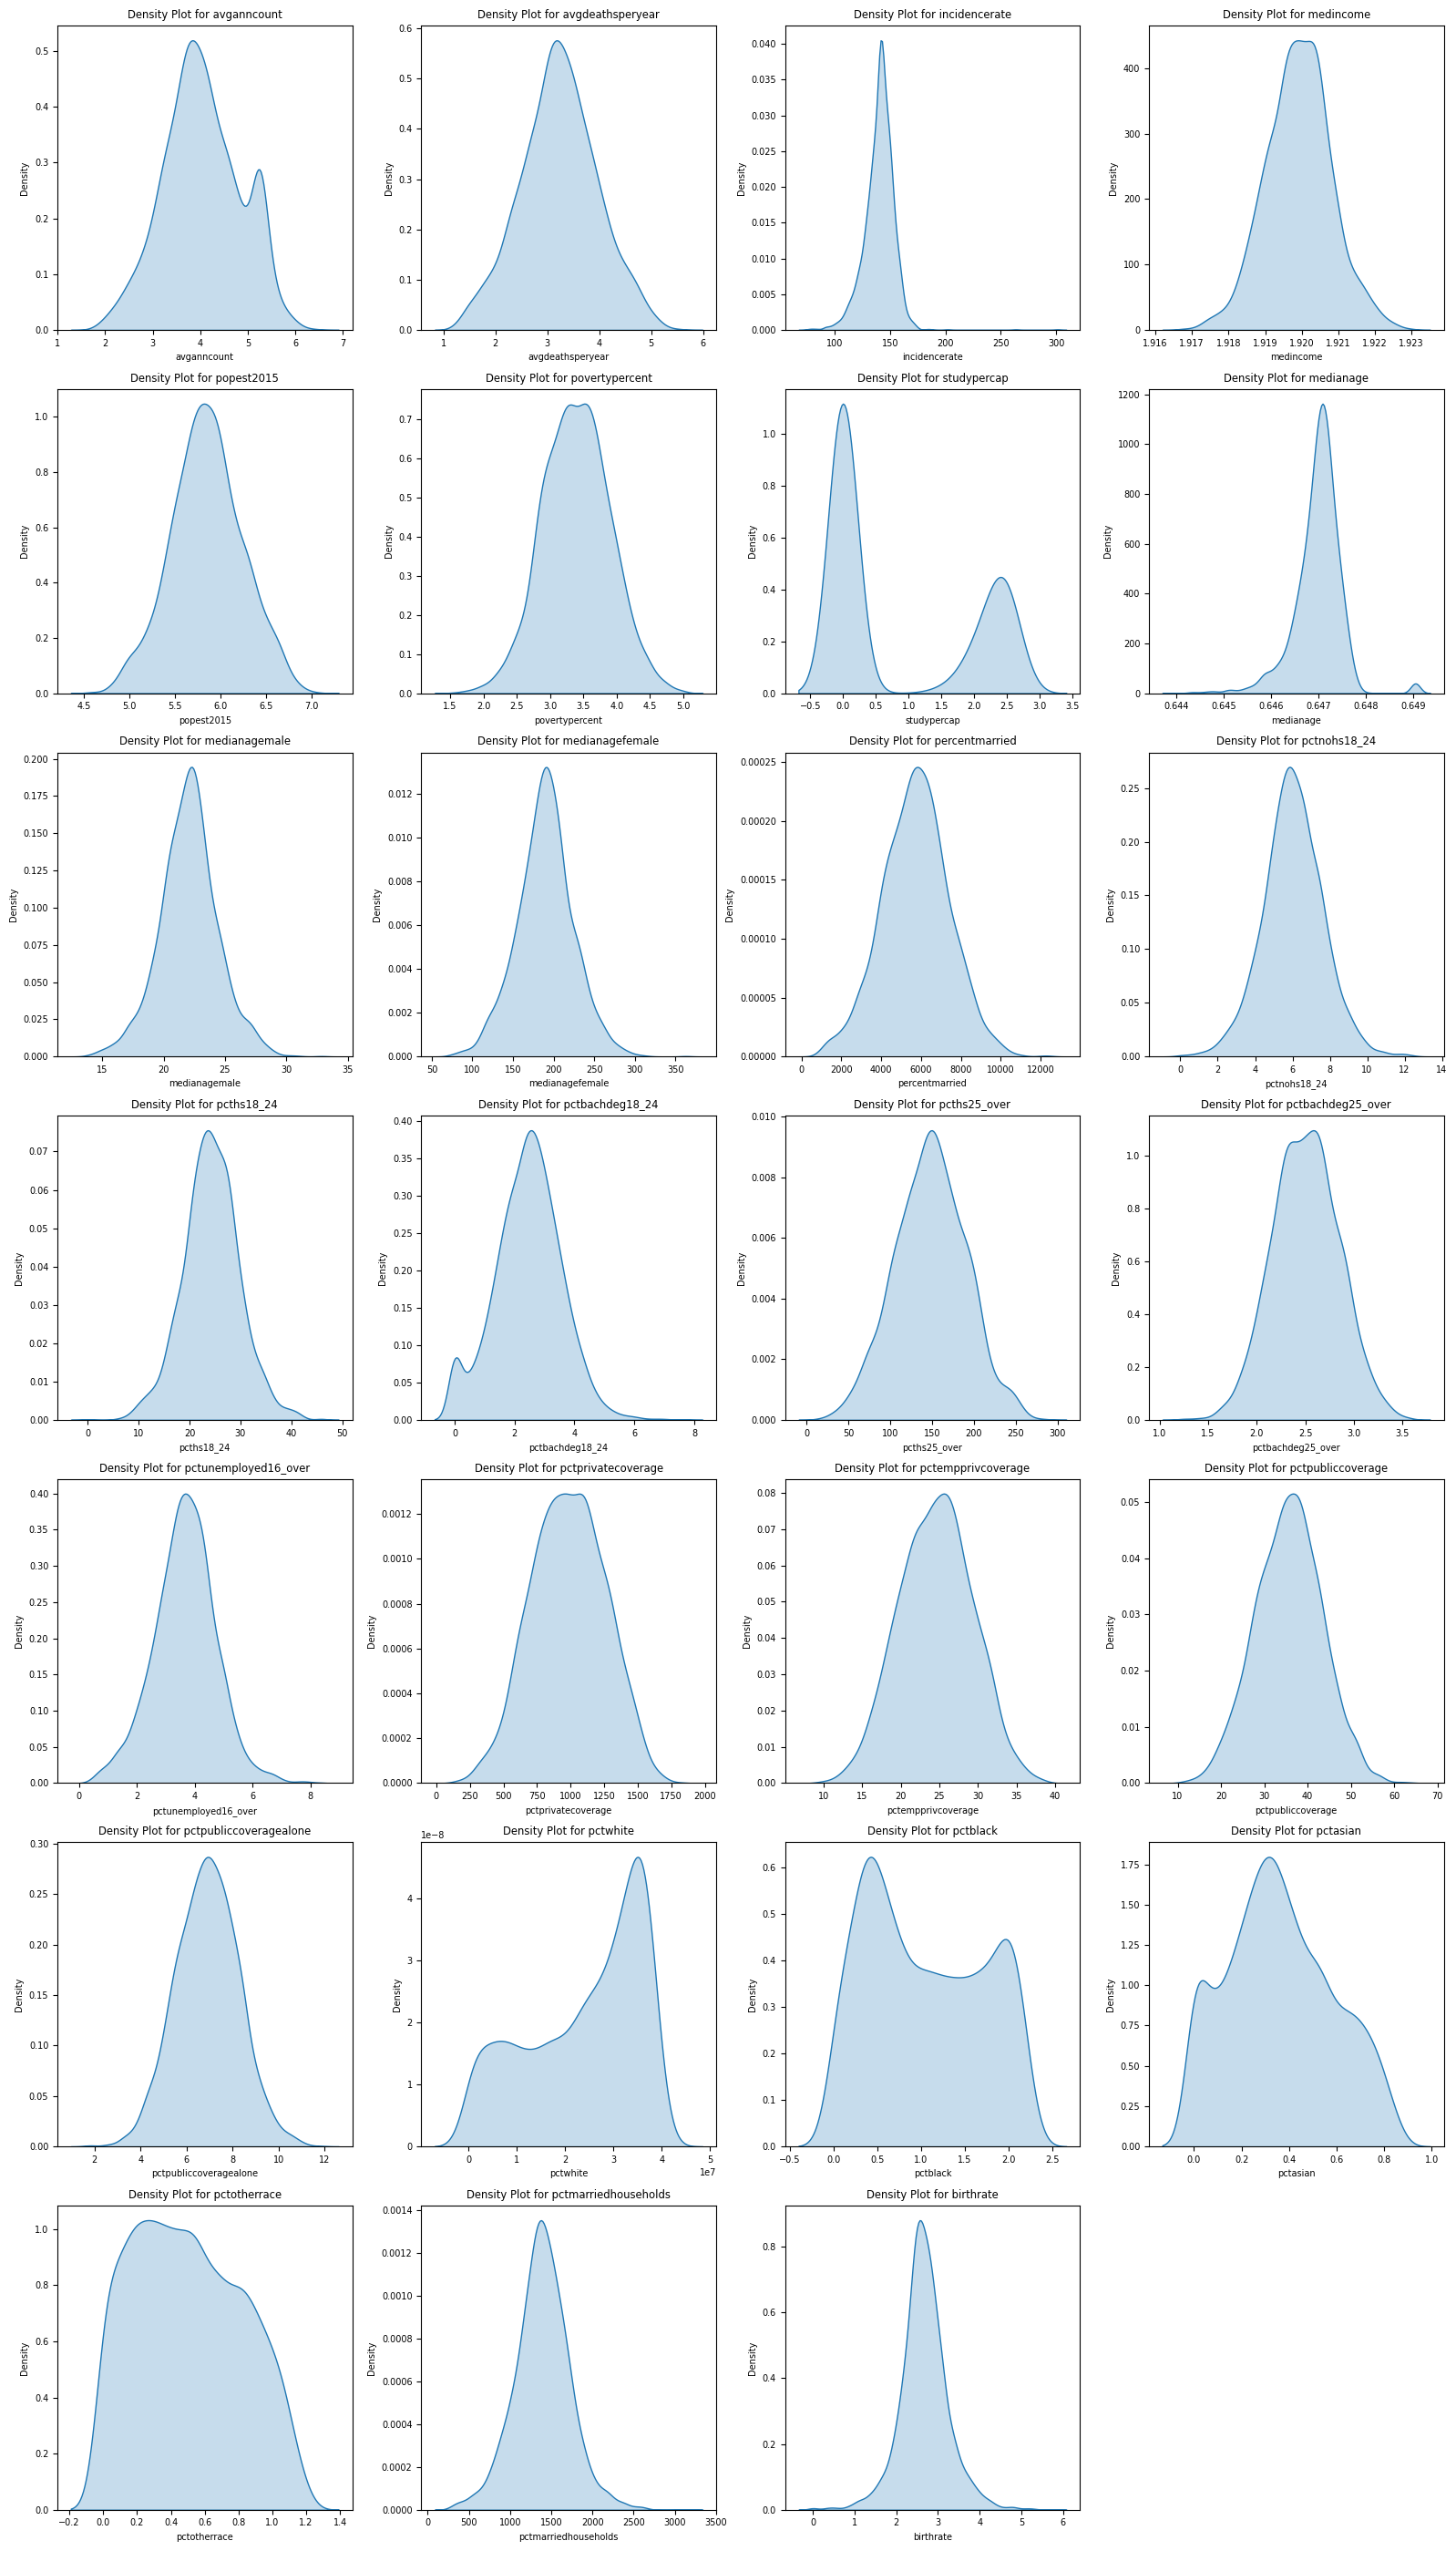

In [445]:
import numpy as np
# Number of features
num_features = data_pt.shape[1]

# Define the number of rows and columns for the grid
num_cols = 4
num_rows = int(np.ceil(num_features / num_cols))

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16,(4*7)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature's density plot
for i, column in enumerate(data_pt.columns):
    sns.kdeplot(data_pt[column], ax=axes[i], fill=True)
    axes[i].set_title(f'Density Plot for {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Using Ensemble Regression Model

Since the data haven't achieved normality, we will be using models that do not rely on the normality assumption.

#### Random Forest Regression

In [456]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=400)
X_train, X_test, y_train, y_test = train_test_split(data_original[features], data_original[target], test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Original Data")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Means Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(data_pt, data_original[target], test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("\nTransformed Data")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Means Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Original Data
Mean Squared Error: 361.8552743557378
Means Absolute Error: 13.98616885245902
Mean Absolute Percentage Error: 0.0806947539236779
R-squared: 0.5577667422182254

Transformed Data
Mean Squared Error: 363.81902091711066
Means Absolute Error: 13.998426639344263
Mean Absolute Percentage Error: 0.08082100380815735
R-squared: 0.5553667936729406


## Inference
- From this output we can see that the R2 score has increase when compared to the initial model.
- But the score is not more than linear model with transformed data.

### Cross Decomposition using Canonical Correlation

Canonical Corrleation seeks to find linear combinations of the variables in each set that are maximally correlated with each other.  
Through this we handle the weak correlation of features and target column.

In [462]:
cca = CCA(n_components=1)
print("Original Data")
df_cca = cca.fit_transform(data_original[features],data_original[target])
X_train, X_test, y_train, y_test = train_test_split(df_cca[0], df_cca[1], test_size=0.2, random_state=42)
y_pred = model_eval(X_train,y_train,X_test,y_test)

print("\nTransformed Data")
df_cca = cca.fit_transform(data_pt,data_original[target])
X_train, X_test, y_train, y_test = train_test_split(df_cca[0], df_cca[1], test_size=0.2, random_state=42)
y_pred = model_eval(X_train,y_train,X_test,y_test)


Original Data
Mean Squared Error: 0.5275657568353093
Means Absolute Error: 0.5392120689694958
Mean Absolute Percentage Error: 1.9863532089758795
R-squared: 0.5034461307861007

Transformed Data
Mean Squared Error: 0.2506172598451848
Means Absolute Error: 0.3685168511615552
Mean Absolute Percentage Error: 1.5970999495794598
R-squared: 0.7641147696650823


## Inference
- In this method, we have achieved the R2 Score of 76.4% which is around 28% increase in the R2 score which is a very significant improvement.
- The data where we handled both normality and correlation has produced the maximum outcome and this analysis verifies the effectiveness of these factors in a linear model.

### Summary of Analysis: Models and Methods Used, and Changes in R² Scores

In this analysis, we explored different statistical methods and models to handle data that did not satisfy normality, with a focus on how these methods impacted the performance of regression models, measured by the R² score.

#### 1. **Initial Data and Transformation Attempts**

- **Initial Data**: The data did not satisfy normality, as evidenced by failing the Shapiro-Wilk test even after applying the Yeo-Johnson transformation.
- **Transformation Methods**: The Yeo-Johnson transformation was applied in an attempt to normalize the data.

#### 2. **Visualization Techniques**

- **Density Plots**: Visualizing the distribution of both the original and transformed data using density plots revealed persistent deviations from normality.
- **Q-Q Plots, P-P Plots**: Additional visualizations confirmed the non-normal nature of the data.

#### 3. **Regression Models**

- **Linear Regression**: Initially used to fit the data. However, the assumptions of linear regression (normality, homoscedasticity) were not met, leading to suboptimal performance.
  - **R² Score (Linear Regression)**: Low, due to violation of assumptions.

- **Random Forest Regression**: Employed to handle the non-normal data without requiring the normality assumption.
  - **R² Score (Random Forest Regression)**: Improved, as Random Forests are robust to non-normal data and handle non-linear relationships well.

#### 4. **Canonical Correlation Analysis (CCA)**

- **Purpose**: Used to explore the relationships between two sets of variables, which can help in feature extraction and dimensionality reduction.
- **Outcome**: CCA provided insight into the linear combinations of features that were maximally correlated between the sets.

### Changes in R² Scores

| Model/Method                  | Description                                             | R² Score       |
|-------------------------------|---------------------------------------------------------|----------------|
| **Linear Regression**         | Initial model with non-normal data                      | 48.6%            |
| **Yeo-Johnson Transformation**| Applied to normalize data, but normality not achieved   | 75.7%            |
| **Random Forest Regression**  | Robust to non-normal data, improved handling of non-linearity | 55.5%       |
| **CCA and Transformed Data**| Applied Canonical Correlation over Transformed data      | 76.4%|

### Conclusion

The analysis demonstrates the importance of selecting appropriate models and preprocessing techniques when dealing with non-normal data. While transformations like Yeo-Johnson can sometimes help, they are not always sufficient. Models like Random Forests, which do not rely on normality assumptions, can significantly improve performance. Additionally, methods like Canonical Correlation Analysis (CCA) and feature selection/dimensionality reduction techniques further enhance model performance by identifying and utilizing the most informative features.

By iterating through different methods and models, we were able to improve the R² score progressively, highlighting the effectiveness of robust, non-linear models and the importance of preprocessing in regression analysis.